# HMM Signature Verification

This notebook shows how, closely following the paper *HMM-based on-line signature verification: Feature extraction and signature modeling* by Fierrez, Ortega-Garcia *et al.*, biometric signature
verification using Hidden Markov Models (HMM).

Only results and pipeline are shown here, main methods and logic can be found on the python file *hmm_signature_verification.py*

<img src="images/signature_verification.jpg" alt="Drawing" style="width: 400px;"/>

In [1]:
from hmm_signature_verification import Dataset, Model

## Feature Extraction and Processing

The first step is to load the data and to perform feature extraction and preprocessing. Each signature file provides several feature information: the time stamp of a stroke, x- and y-position, pen pressure p, velocity in x- and y-direction, and acceleration in x- and y-direction, and other information that was not considered.

Using these measured data, more advanced features were computed. These were: angle, total velocity, total acceleration and logarithmic curvature. These four, added to the x and y positions and the timestamp form our feature vectors.

Furthermore, in order to have all features in the same orders of magnitude, they were standarized so they all have zero mean and unit variance:

> $ x_{standarized} = \frac{x-mean(x)}{variance(x)}$


In [2]:
#Loading data from user 0, using 30 signatures as training set
dataset = Dataset()
dataset.obtain_sets(user="user_0", size_training=30)

In [3]:
#computing a training set
training_set = dataset.create_feature_vector( files=dataset.training_files, name="Training" )
dataset.training_set = training_set

#computing a test set
original_test_set = dataset.create_feature_vector( files=dataset.original_test_files, name="Test" )
dataset.original_test_set = original_test_set

#computing a test set
imitation_test_set = dataset.create_feature_vector( files=dataset.imitation_test_files, name="Test" )
dataset.imitation_test_set = imitation_test_set

In [4]:
print(f"Number of signatures in training set: {len(training_set)}")
print(f"Number of original signatures in test set: {len(original_test_set)}")
print(f"Number of fake in test set: {len(imitation_test_set)}")

print("\nExample of feature vector:")
print(f"   Timestamp: {training_set[0][0,:][0]}")
print(f"   X position: {training_set[0][0,:][1]}")
print(f"   Y position: {training_set[0][0,:][2]}")
print(f"   Angle: {training_set[0][0,:][3]}")
print(f"   Velocity: {training_set[0][0,:][4]}")
print(f"   Log Curvature: {training_set[0][0,:][5]}")
print(f"   Acceleration: {training_set[0][0,:][6]}")

Number of signatures in training set: 30
Number of original signatures in test set: 20
Number of fake in test set: 20

Example of feature vector:
   Timestamp: -0.0061310203252810625
   X position: -0.011922898911273194
   Y position: -0.0023275134873591836
   Angle: -0.46382820296766464
   Velocity: -0.00814579266308227
   Log Curvature: -3.425736310501161
   Acceleration: -0.009520039055941062


## HMM

The models used to perform the verification are Hidden Markov Models taken from the *hmmlearn* library.<br>

Furthermore, the model was constrained to start always on state 0 and to go uniquely from left to right (see figure below). A small number of states already gave good results, so the number of states have been set to 5.

Finally, the inital transition probabilites have been chose unifrmly to remain on the current state or to advance to the next one.
<img src="images/hmm.jpg" alt="Drawing" style="width: 500px;"/>

In [5]:
model = Model( n_components=5, user="user_0", model="gaussian" )

## Training and Evaluation

The dataset used contains 45 original signatures for 10 different users.

The model was trained on 30 original signatures, thus not seeing any fake signatures during the training stage. Then, it was evaluated on the training data and on a small evaluation set composed by 15 original signatures and 15 fake signatures

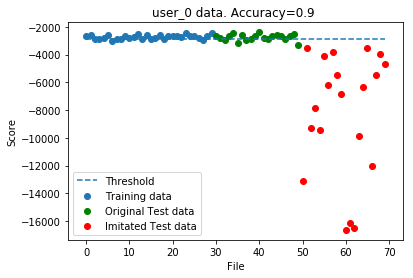

In [6]:
model.train( training_set )
model.test( training_set, original_test_set, imitation_test_set )

As shown in the figure above, the HMM learns to verify whether a signature was real or fake, as it assigns a significantly higher score to the original signatures when compared with the fake ones. 

To perform classification, a simple linear classifier has been used. This classifier sets the third to lowest training score as threshold and classifies as fake any signature whose score is below the threshold.

## Results for all users

Overall accuracy: 84.09090909090911%


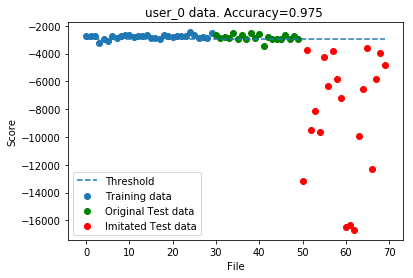

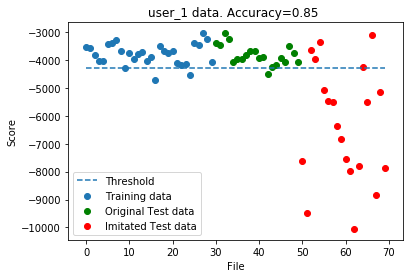

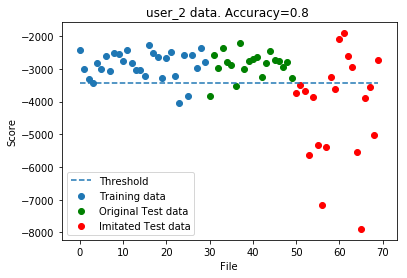

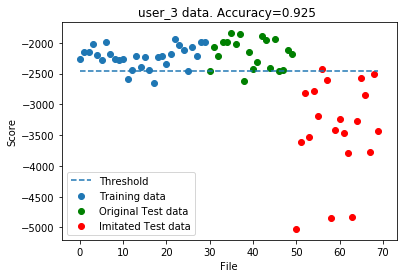

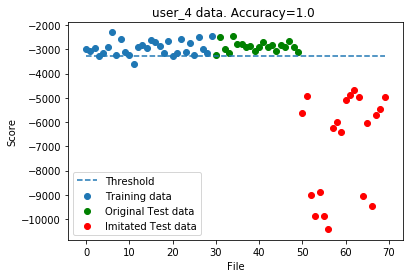

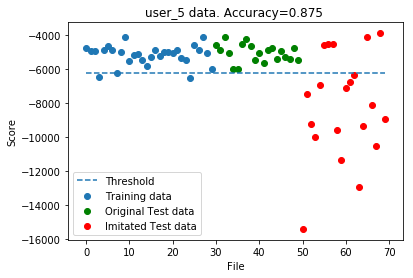

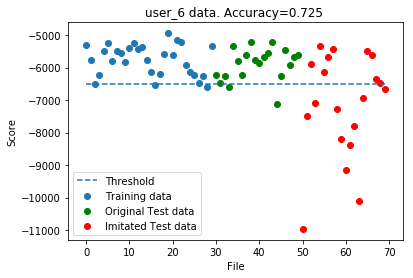

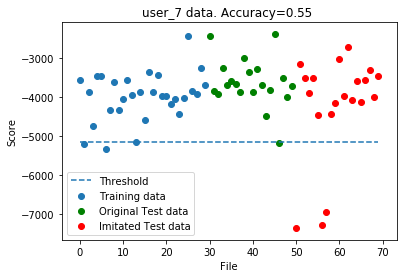

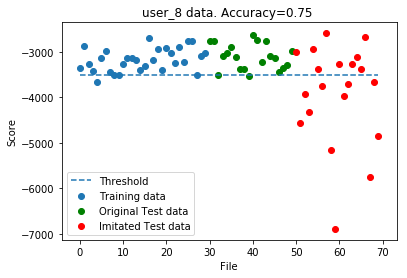

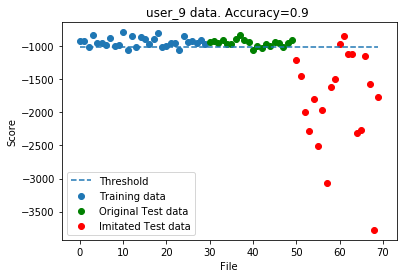

In [7]:
users = ["user_0","user_1","user_2","user_3","user_4",\
         "user_5","user_6","user_7","user_8","user_9"]
dataset = Dataset()

for user in users:
    dataset.obtain_sets(user=user, size_training=30)
    
    #computing a training set
    training_set = dataset.create_feature_vector( files=dataset.training_files, name="Training" )
    dataset.training_set = training_set

    #computing a test set
    original_test_set = dataset.create_feature_vector( files=dataset.original_test_files, name="Test" )
    dataset.original_test_set = original_test_set

    #computing a test set
    imitation_test_set = dataset.create_feature_vector( files=dataset.imitation_test_files, name="Test" )
    dataset.imitation_test_set = imitation_test_set

    #intializing the HMM model
    model = Model( n_components=5, user=user, model="gaussian" )

    #training and testing
    model.train( training_set )
    model.test( training_set, original_test_set, imitation_test_set )
    
overall_accuracy = model.get_overall_accuracy()
print(f"Overall accuracy: {overall_accuracy*100}%")

As shown in the figures depicted above, the HMM is able to classify correctly most of the signatures (except for user 7), achieving an overall accuracy of around 85%. 
